In [1]:
import numpy as np
import pandas as pd
from numpy import linalg
import matplotlib.pyplot as plt
import random
from numpy.linalg import inv

random.seed(1)

'''
def gradient_descent(
    gradient, start, learn_rate, max_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector
'''

def BatchGradientDescent(x, y, r, tolerance=1e-5, max_iter=10000):
    #  initialize weight vector to be 0
    w = np.zeros(x.shape[1])
    b = 0
    iter = 0
    Cost = []
    for each_iter in range(max_iter):
        resd = y - (b + np.dot(x, w))
        J = 0.5 * np.sum(np.square(resd))
        new_b = b + r*(np.sum(resd))
        new_w = w + r*(np.dot((resd),x))
        b = new_b
        w = new_w
        diff = linalg.norm(w)
        Cost.append(J)
        iter += 1
        if (diff < tolerance) or (iter > max_iter):
            break
    return b, w, Cost

def StochasticGradientDescent(x, y, r, tolerance=1e-5, max_iter=10000):
    #  initialize weight vector to be 0
    w = np.zeros(x.shape[1])
    b = 0
    iter = 0
    Cost = []
    for t in range(max_iter):
        i = random.randint(0, len(train_x) - 1)
        resd1 = y - (b + np.dot(x, w))
        resd = y.loc[i] - (b + np.dot(x.loc[i], w))
        J = 0.5 * np.sum(np.square(resd1))
        new_b = b + r*(np.sum(resd))
        new_w = w + r*(np.dot((resd),x.loc[i]))
        b = new_b
        w = new_w
        diff = linalg.norm(w)
        Cost.append(J)
        iter += 1
        if (diff < tolerance) or (iter > max_iter):
            break
    return b, w, Cost

b: -0.015196930605430013 w: [0.90055166 0.78628007 0.85102883 1.29888387 0.12988852 1.57223161
 0.99868048] cost:  23.361747097980526


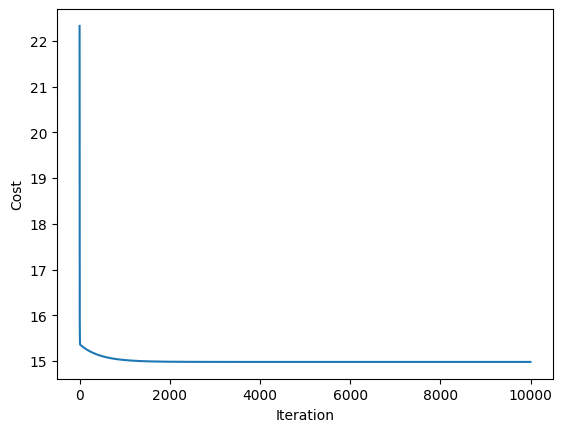

b: -0.02273063661103192 w: [-0.08129121 -0.20981039 -0.24609873  0.47042918 -0.03877691  0.24193239
  0.01585612] cost:  22.669238567678097


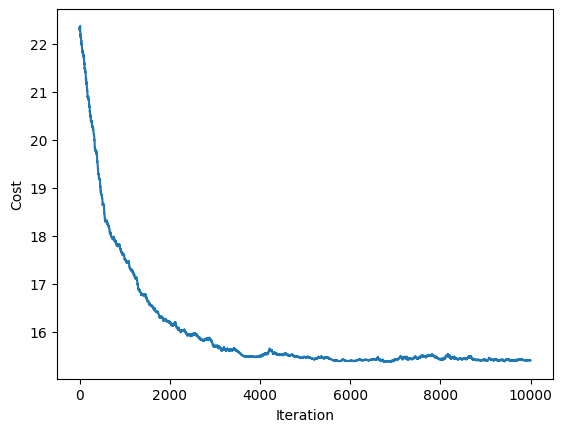

w: [0.92154947 0.80829428 0.87397433 1.3142877  0.13392374 1.59904727
 1.02029192]


In [2]:
train = pd.read_csv('Data/train.csv', header=None)
test = pd.read_csv('Data/test.csv', header = None)
train_x = train.iloc[:,0:(len(train.columns)-1)]
train_y = train.iloc[:,-1]
test_x = test.iloc[:,0:(len(test.columns)-1)]
test_y = test.iloc[:,-1]

#BatchGradientDescent
b1, w1, Cost1=BatchGradientDescent(train_x,train_y, 0.01)
resd = test_y - (b1 + np.dot(test_x, w1))
J1 = 0.5 * np.sum(np.square(resd))
print("b:",b1, "w:", w1, "cost: ", J1)

plt.plot(Cost1)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()


#StochasticGradientDescent
b2, w2, Cost2=StochasticGradientDescent(train_x,train_y, 0.001)
resd = test_y - (b2 + np.dot(test_x, w2))
J2 = 0.5 * np.sum(np.square(resd))
print("b:",b2, "w:", w2, "cost: ", J2)

plt.plot(Cost2)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

#the optimal weight vector with an analytical form
w3 = np.dot(np.dot(inv(np.dot(np.transpose(train_x),train_x)),np.transpose(train_x)),train_y)
print("w:", w3)